<a href="https://colab.research.google.com/github/josecomartins/josecomartins.github.io/blob/main/Omni_MSL_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://github.com/josecomartins/josecomartins.github.io/blob/main/LAR_logo_dark_v2.1_BANNER.png?raw=true)](https://lar.dei.uminho.pt/)

# How to Train YOLOv8 Object Detection and Segmentation on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://www.youtube.com/@lar_uminho)
[![Instagram](https://badges.aleen42.com/src/instagram.svg)](https://www.instagram.com/lar_uminho/)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Feb 26 19:52:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:01<00:00, 4.93MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 7.43MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.6ms
Speed: 1.9ms pre-process, 14.6ms inference, 47.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


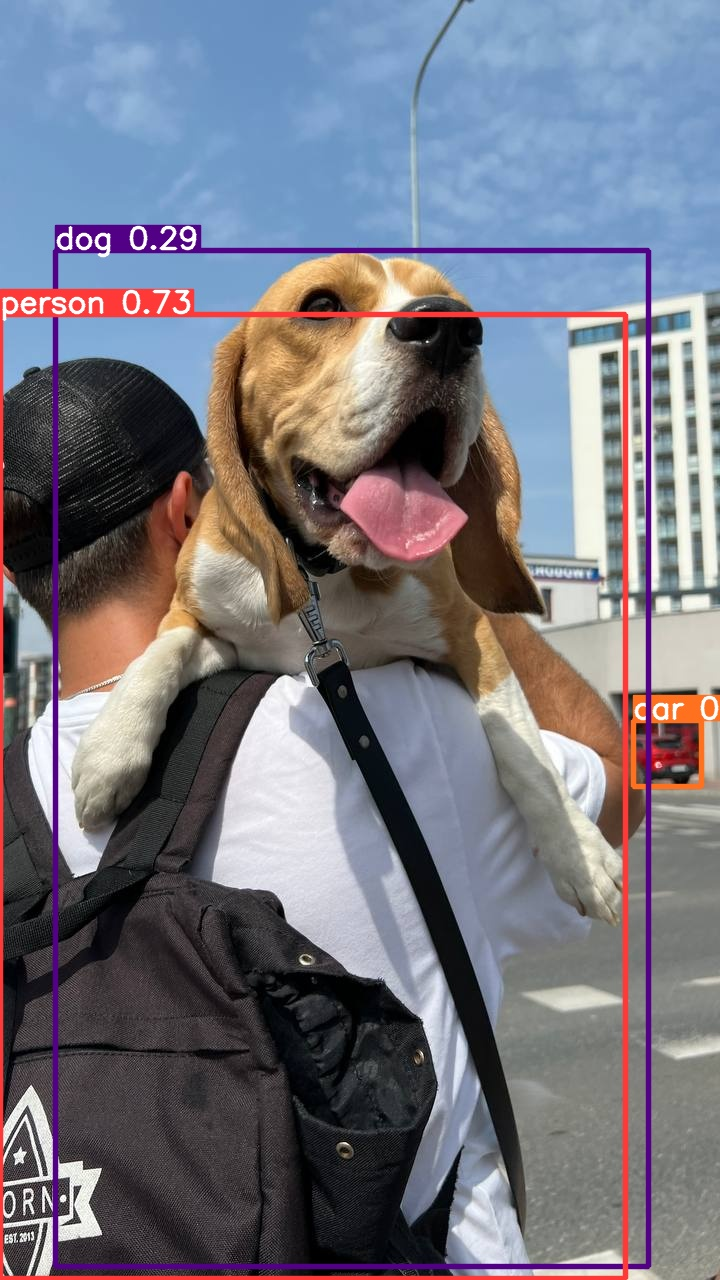

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, with Labelme and Roboflow you can annotate and export to many types of algorithms. Let me show you how!

Note: In Roboflow you can do annotation but has a web interface so is fastest offline using Labelme.

### Step 1: Install Labelme

Before you start, you need to install Labelme on your computer

####Ubuntu:

sudo apt-get install python3-pyqt5  # PyQt5

sudo pip3 install labelme

Or:

[Install executable for Linux](https://github.com/wkentaro/labelme/releases/download/v5.1.1/labelme-Linux)

####Windows:

[Install executable for Windows](https://github.com/wkentaro/labelme/releases/download/v5.1.1/Labelme.exe)

####MacOS:

[Install executable for MacOS](https://github.com/wkentaro/labelme/releases/download/v5.1.1/labelme-macOS)

### Step 2: Annotation for segmentation

Select:"Create Polygons"

Draw the contours

Label the countour, in this case "human"


#### Good annotation:

Before annotation choose witch classes you want to detect.

Verify all your dataset frequently, because you can forget a class or put wrong labels. 

Try to do better then the next gif.


<div align="center">
  <img
    width="640"
    src="https://github.com/josecomartins/josecomartins.github.io/blob/main/Annotation.gif?raw=true"
  >
</div>

### Step 3: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Instance Segmentation.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 4: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
!mkdir datasets
%cd datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="vwFRi233QozkicYHpFpz")
project = rf.workspace("omnidatasetsegmentation").project("msl-omnidirecional-lar-uminho")
dataset = project.version(1).download("yolov8")
display.clear_output()
print("Successful Dataset Download ✔️")
# --- TRAIN IN PYTHON ---
# yolov8 small network instance segmentation
#model =YOLO("yolov8s-seg.pt") # Continue using las train: YOLO("/content/datasets/runs/segment/train/weights/best.pt")
#model.train(task="segment",data="/content/datasets/MSL-Omnidirecional-LAR-UMinho-1/data.yaml", epochs=20,imgsz=480,plots=True)

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MSL-Omnidirecional-LAR-UMinho-1 in yolov8:: 100%|██████████| 366/366 [00:00<00:00, 2387.28it/s]


## Custom Training

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/datasets/MSL-Omnidirecional-LAR-UMinho-1/data.yaml epochs=20 imgsz=480 plots=True

100% 22.8M/22.8M [00:00<00:00, 33.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/datasets/MSL-Omnidirecional-LAR-UMinho-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=480, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

In [ ]:
!ls /content/datasets/runs/segment/train

args.yaml					    results.csv
BoxF1_curve.png					    results.png
BoxP_curve.png					    train_batch0.jpg
BoxPR_curve.png					    train_batch100.jpg
BoxR_curve.png					    train_batch101.jpg
confusion_matrix.png				    train_batch102.jpg
events.out.tfevents.1677441483.6b9128166eac.2532.0  train_batch1.jpg
MaskF1_curve.png				    train_batch2.jpg
MaskP_curve.png					    val_batch0_labels.jpg
MaskPR_curve.png				    val_batch0_pred.jpg
MaskR_curve.png					    weights


/content


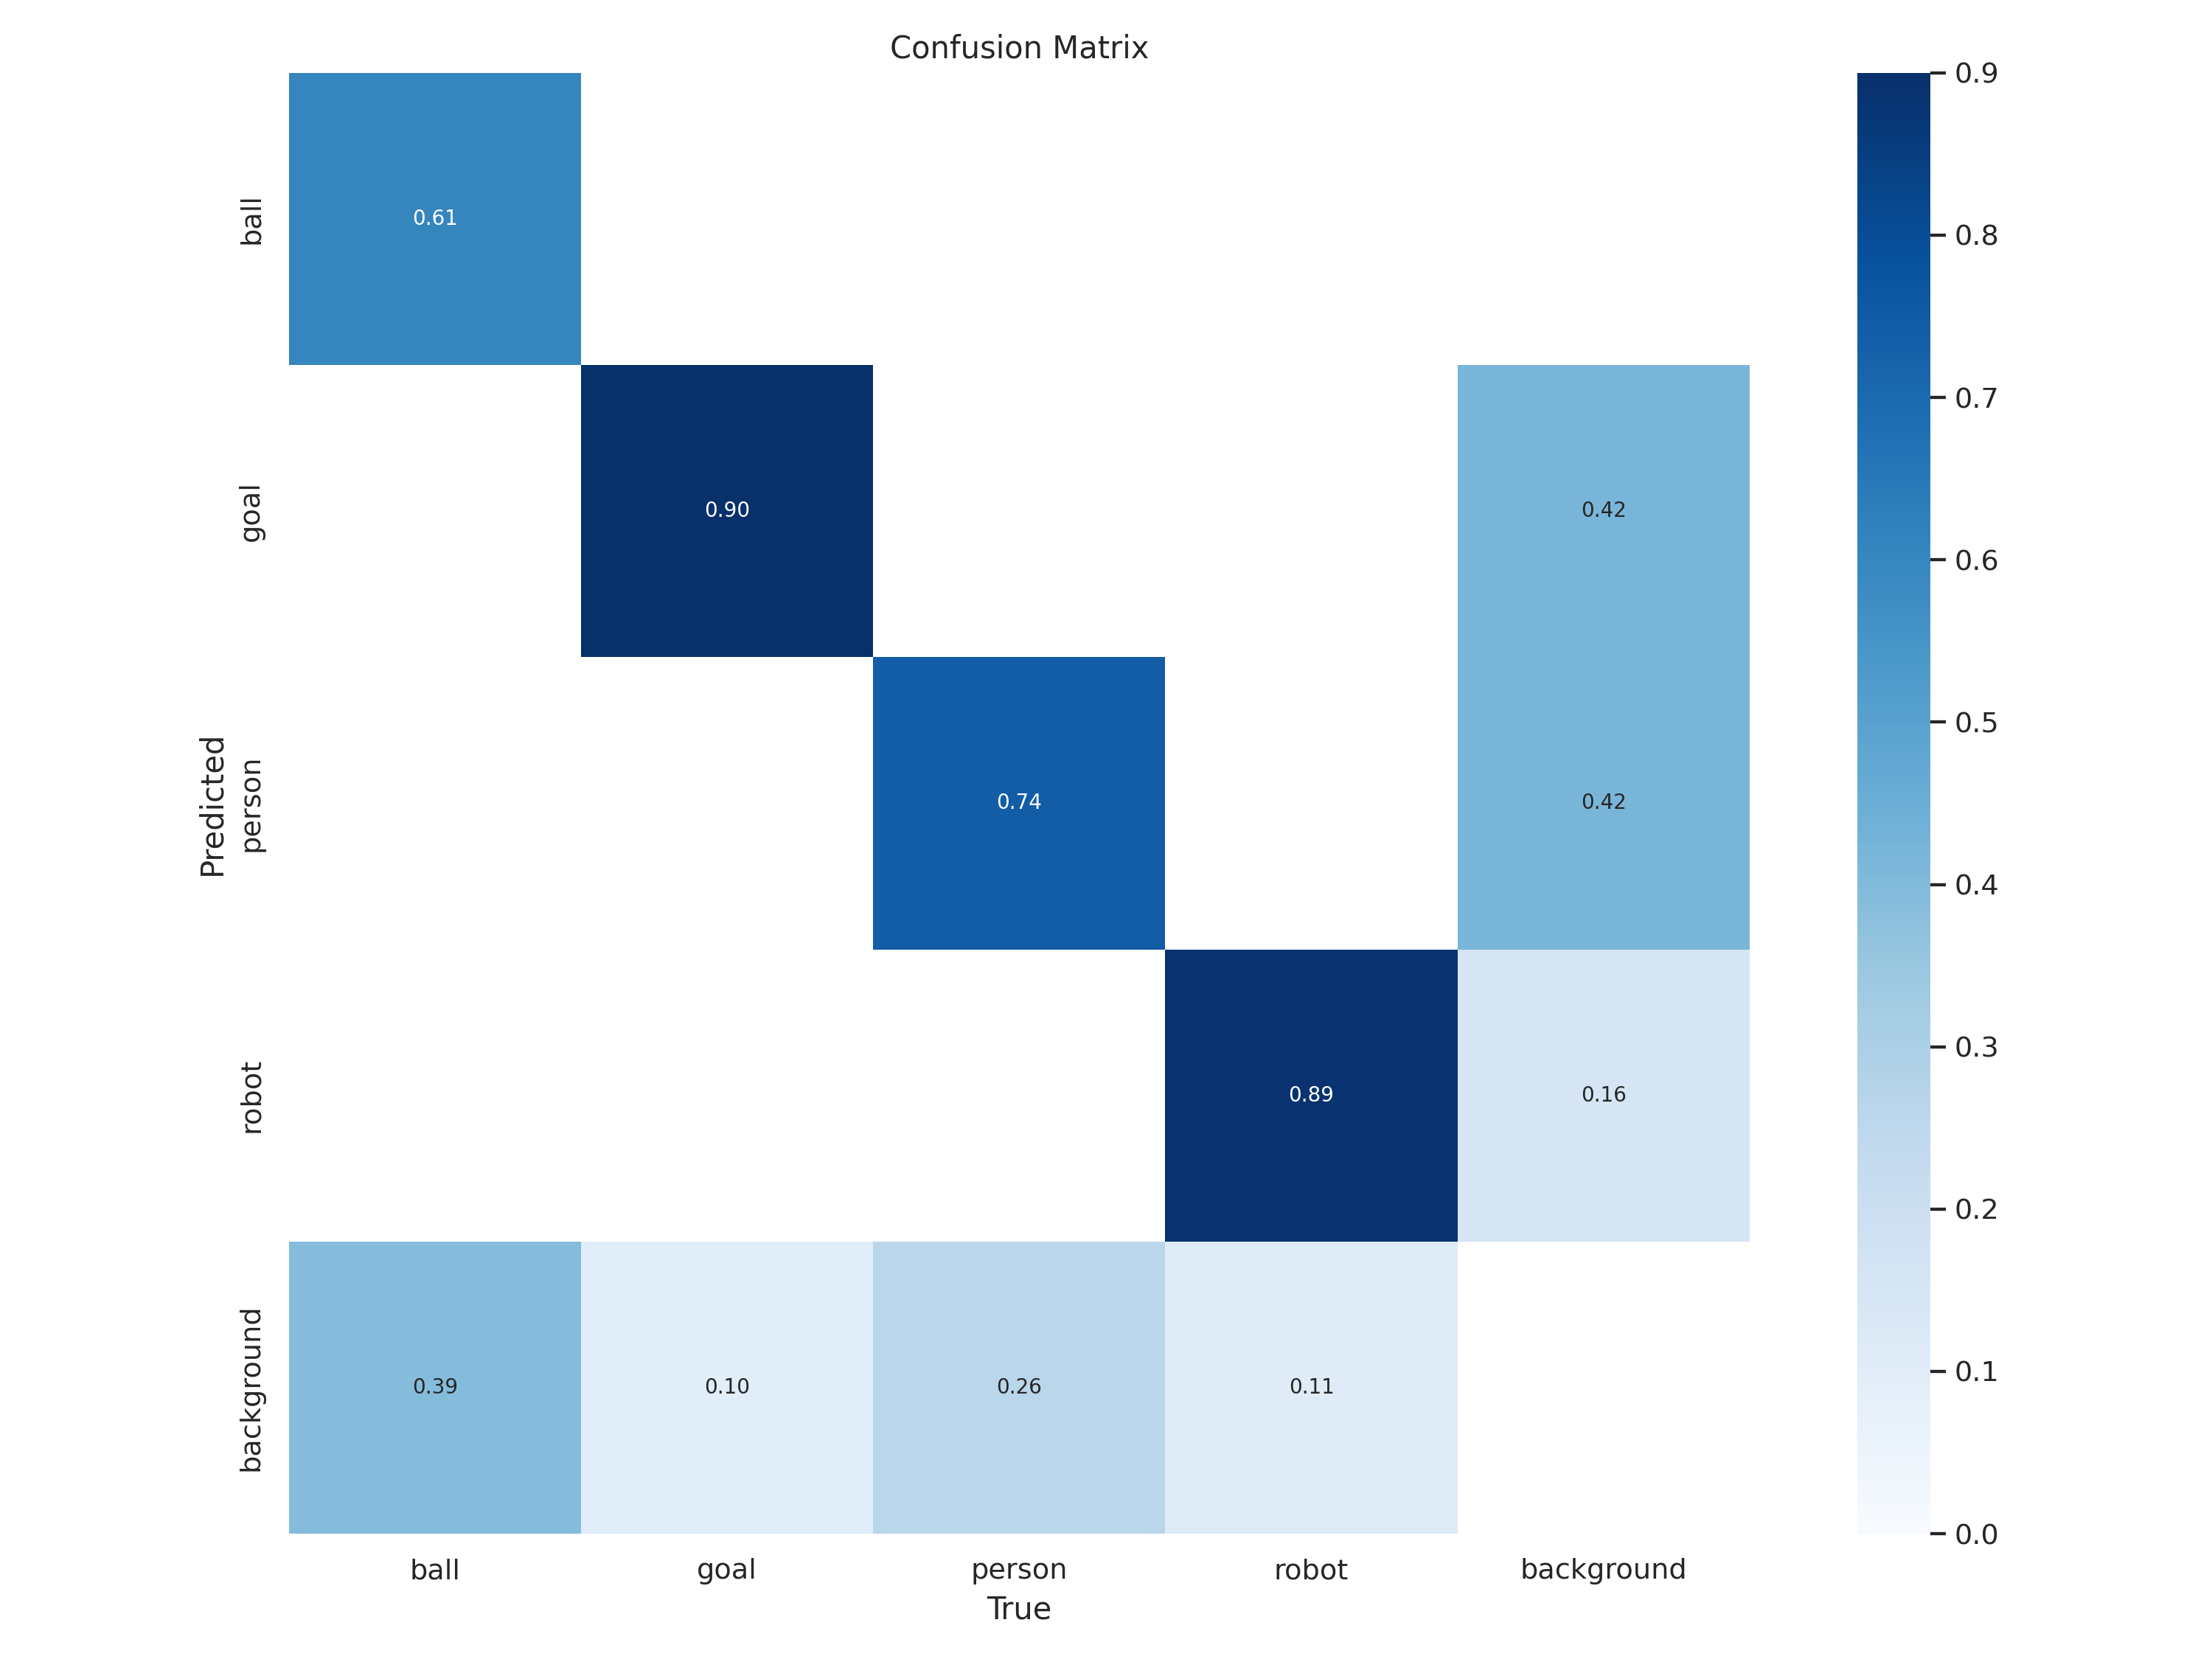

In [ ]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/segment/train/confusion_matrix.png', width=900)

/content


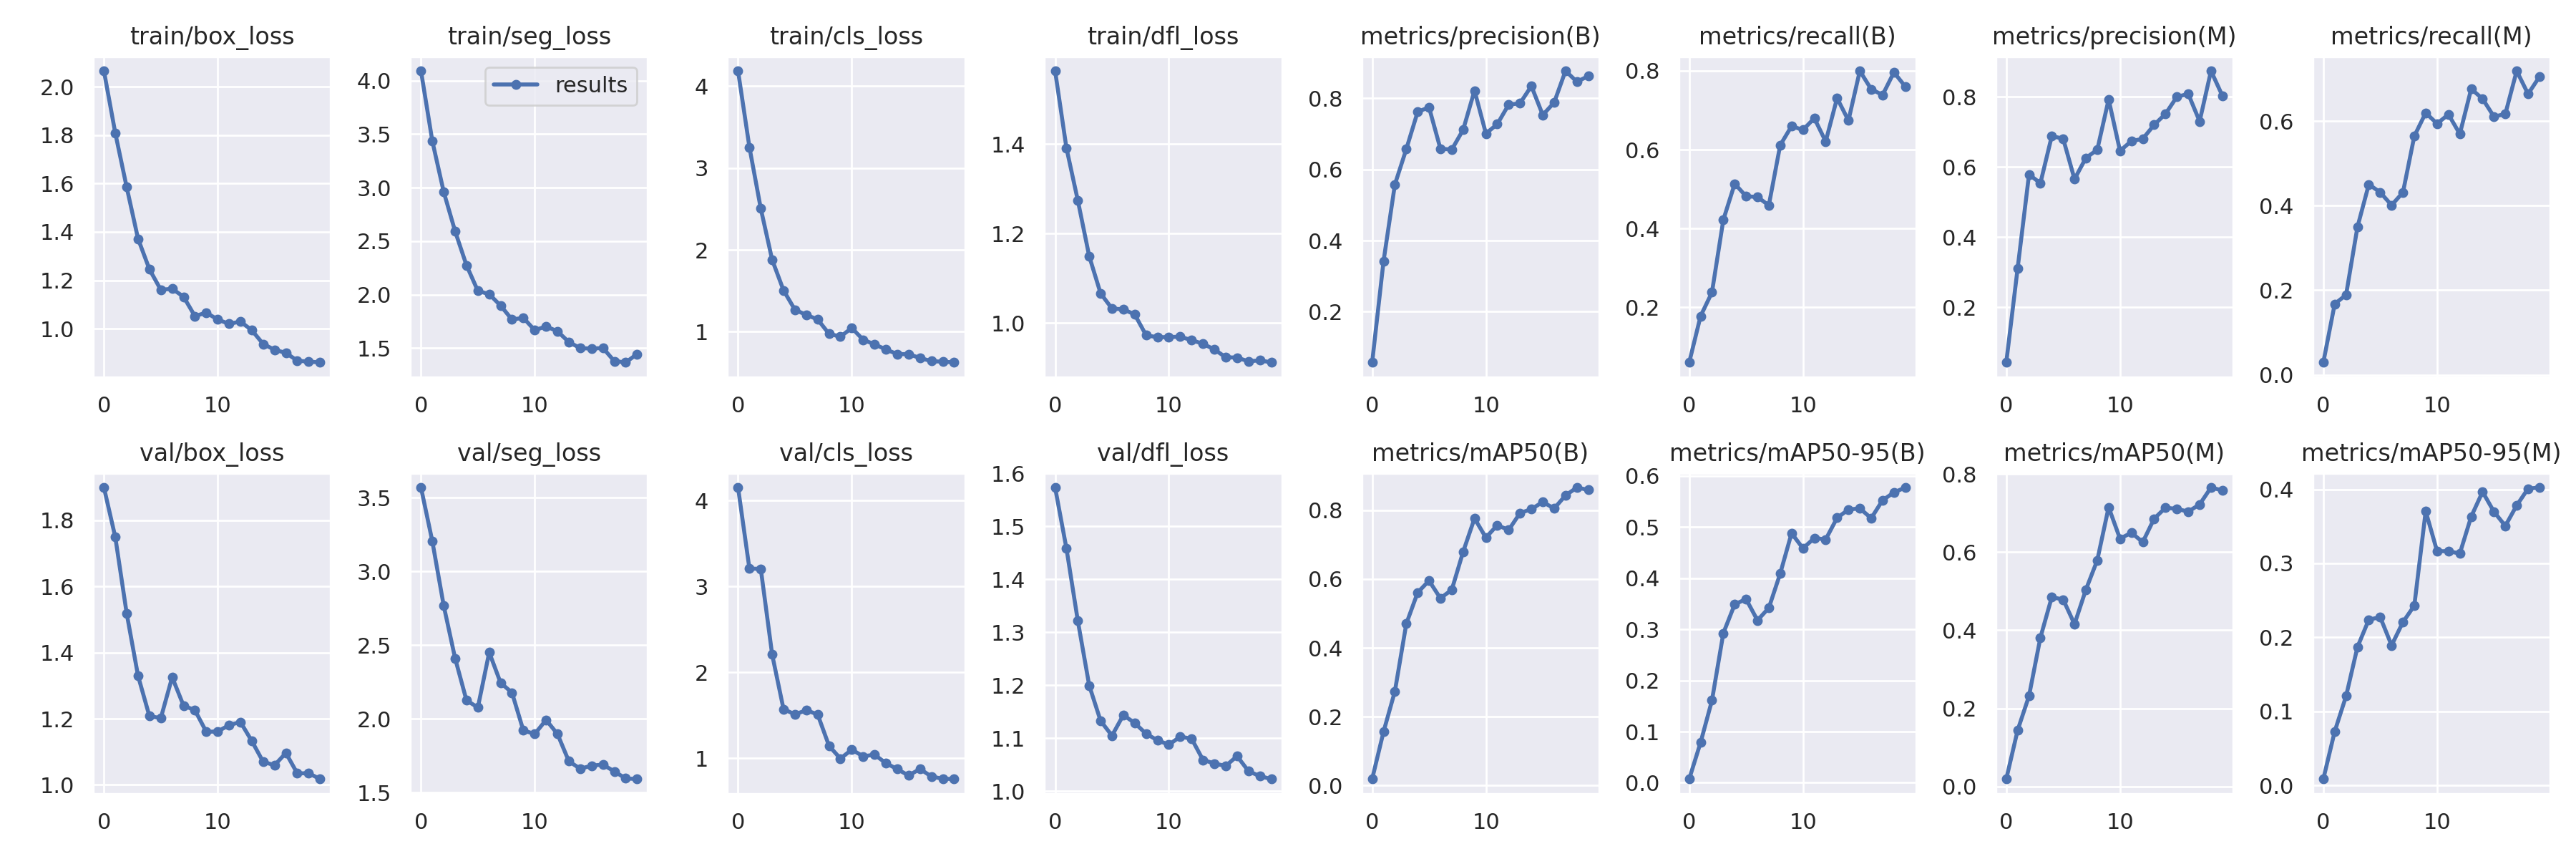

In [ ]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/segment/train/results.png', width=1200)

/content


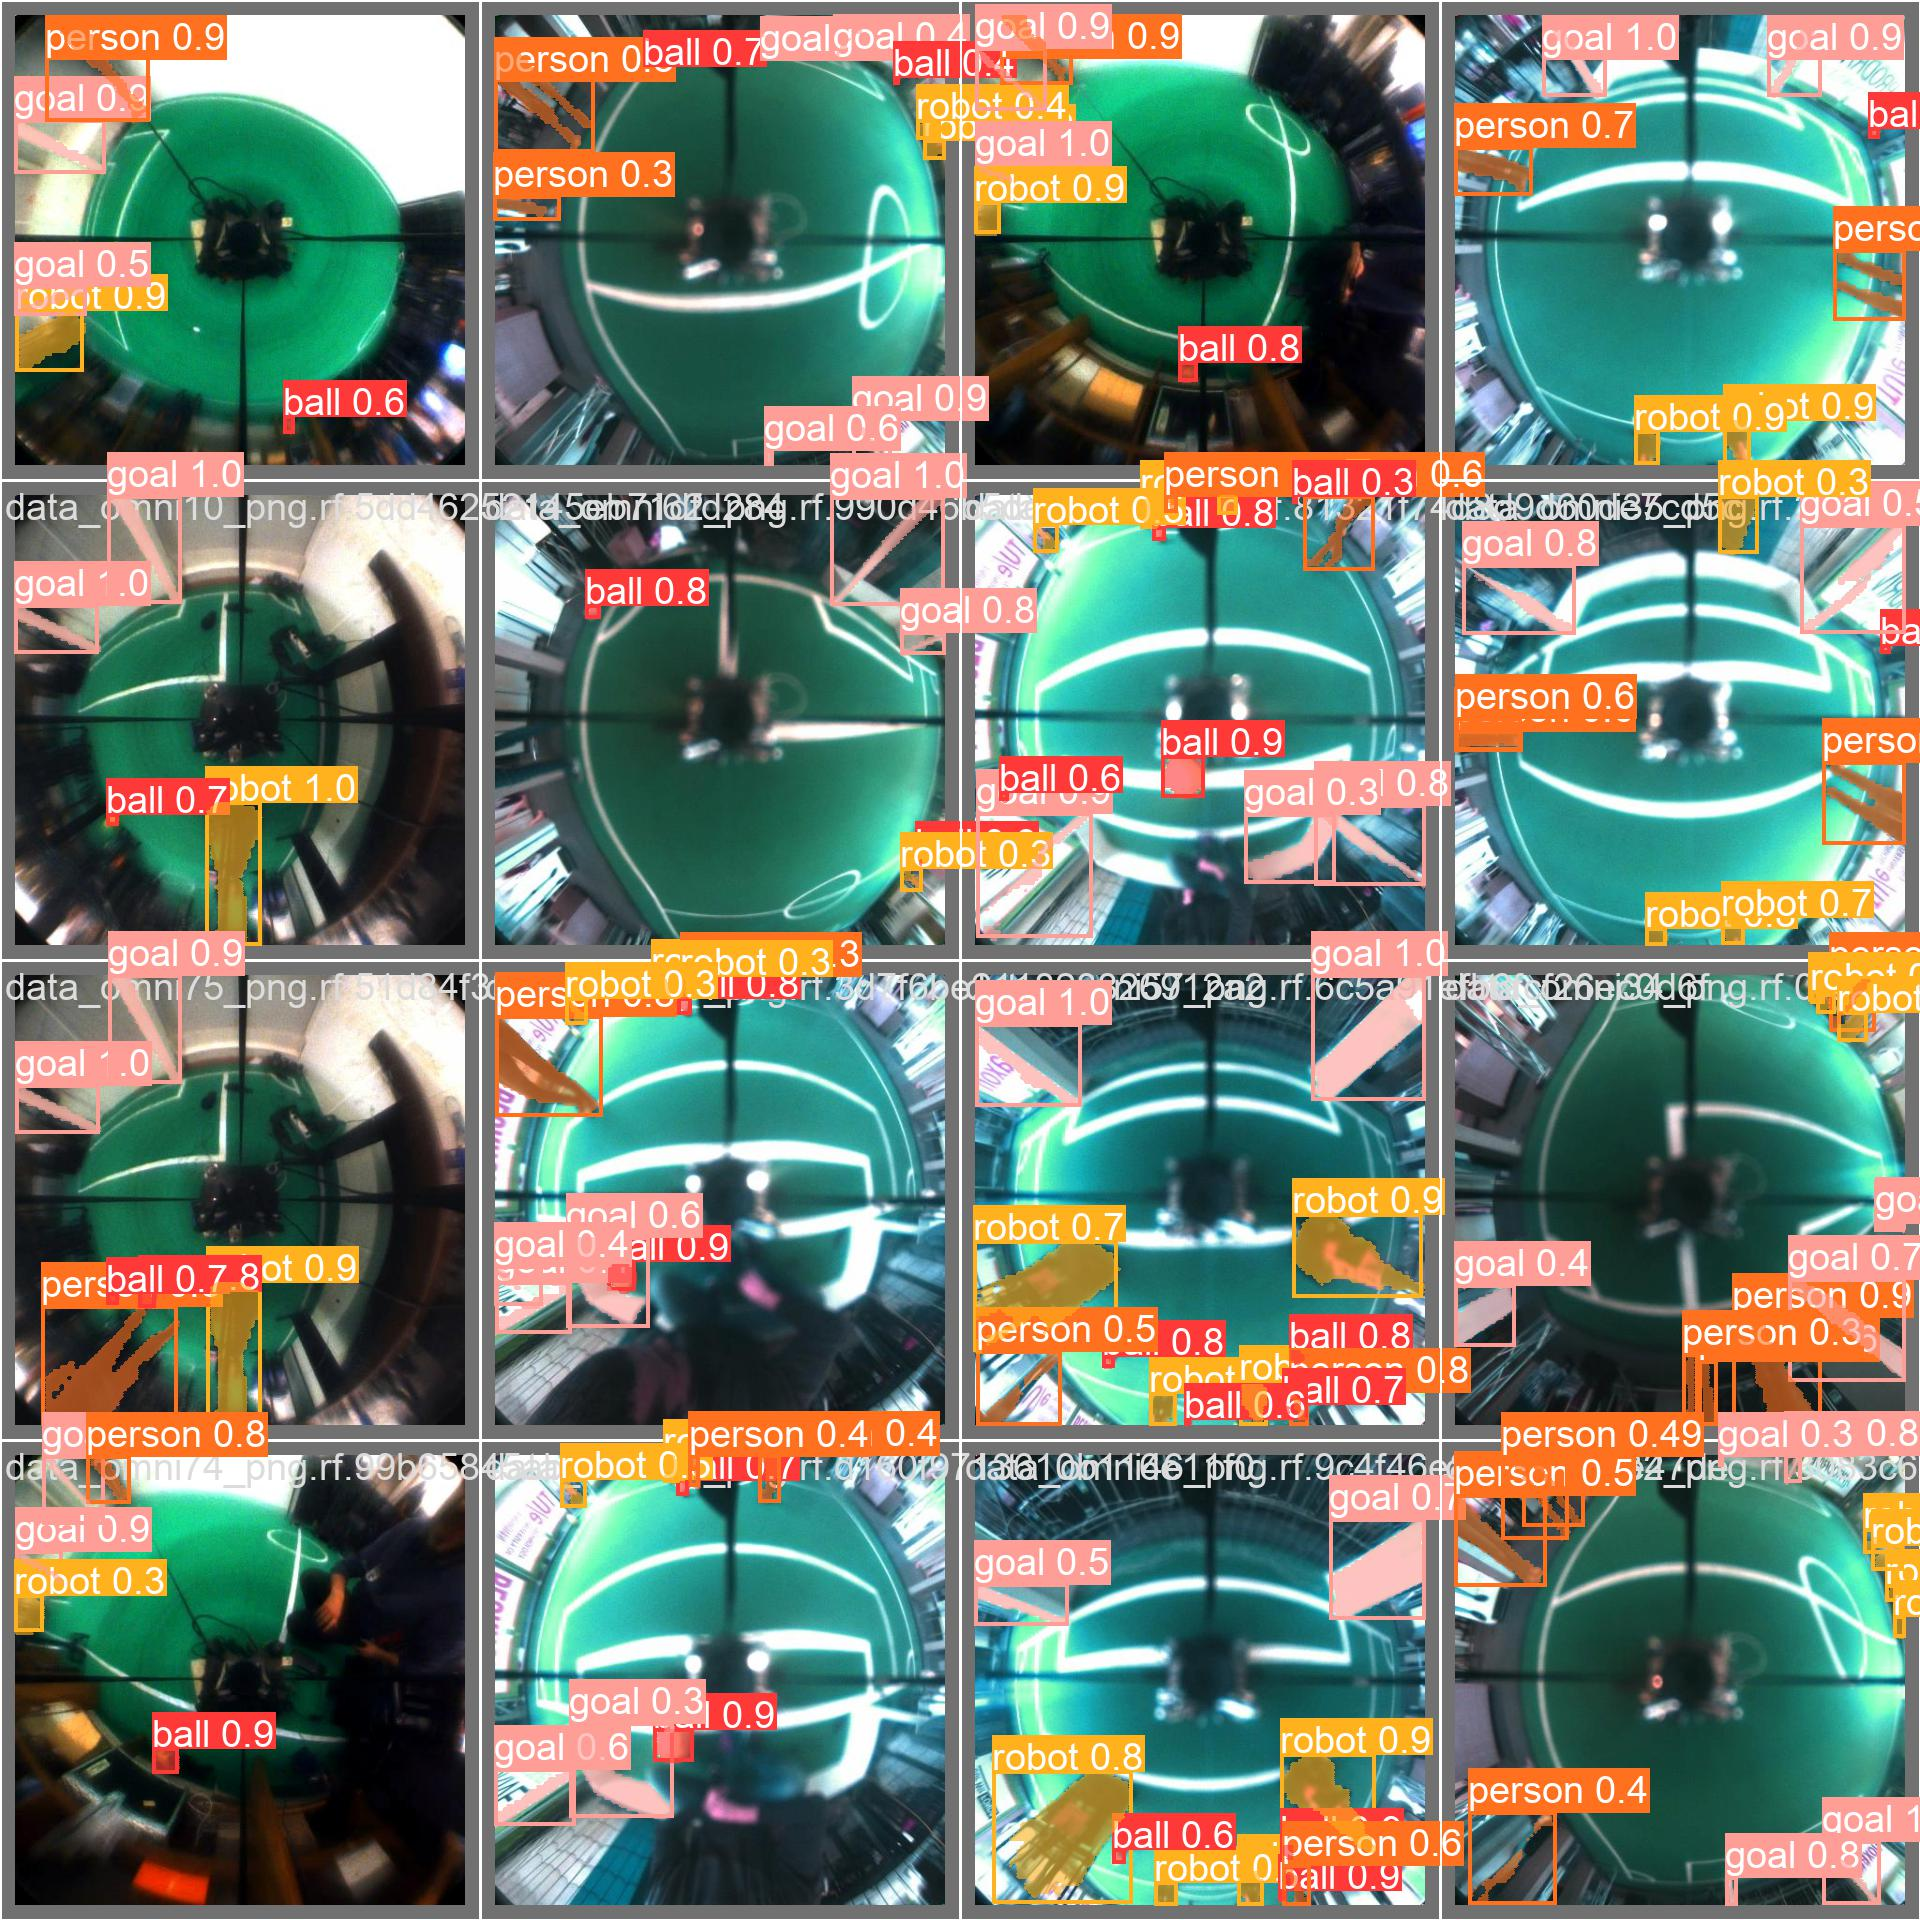

In [ ]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/segment/train/val_batch0_pred.jpg', width=1200)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model=/content/datasets/runs/segment/train/weights/best.pt data=/content/datasets/MSL-Omnidirecional-LAR-UMinho-1/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781148 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/MSL-Omnidirecional-LAR-UMinho-1/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.09it/s]
                   all         19        176      0.863       0.76      0.859      0.577      0.788      0.693      0.745      0.397
                  ball         19         56      0.971      0.603      0.832      0.416      0.838      0.518      0.662      0.257
                  goal         19         40      0.833        0.9       0.93      0.713      0.721      0.775      0.814      0.418
                person         19         35      0.729      0.714      0.764      0.498      0.672

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=/content/datasets/runs/segment/train/weights/best.pt conf=0.25 source=/content/datasets/MSL-Omnidirecional-LAR-UMinho-1/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781148 parameters, 0 gradients, 42.4 GFLOPs
image 1/5 /content/datasets/MSL-Omnidirecional-LAR-UMinho-1/test/images/data_omni23_png.rf.91aecb8c13321ad189efce37fedd4f05.jpg: 480x480 1 ball, 2 goals, 14.9ms
image 2/5 /content/datasets/MSL-Omnidirecional-LAR-UMinho-1/test/images/data_omni3_png.rf.47bf3fa6048654c289adff4ba7c81755.jpg: 480x480 2 goals, 2 persons, 3 robots, 15.0ms
image 3/5 /content/datasets/MSL-Omnidirecional-LAR-UMinho-1/test/images/data_omni40_png.rf.40a05ec238b05aacc25d664f91f19542.jpg: 480x480 4 persons, 5 robots, 14.9ms
image 4/5 /content/datasets/MSL-Omnidirecional-LAR-UMinho-1/test/images/data_omni52_png.rf.9e689873f3167e78d55f1d2d0de36787.jpg: 480x480 7 balls, 1 goal, 2 persons, 4 robots, 15.0ms
image 5/5 /content/datasets/MSL-Omnidirecional-LAR-UMinho-1/test/images/data_omni67_png.rf.8c7a3f5780540f7d0e8faa5d98da4994.jpg: 480x480



##Let's take a look at few results.

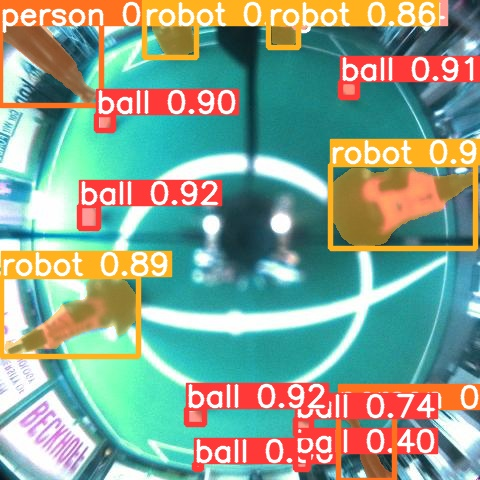

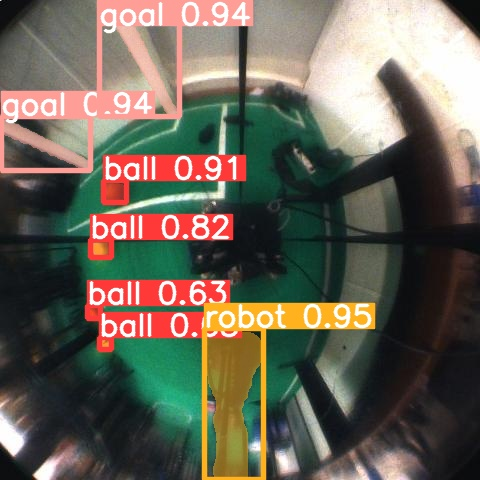

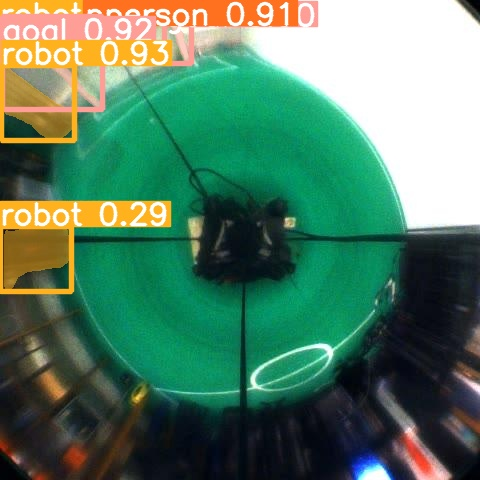

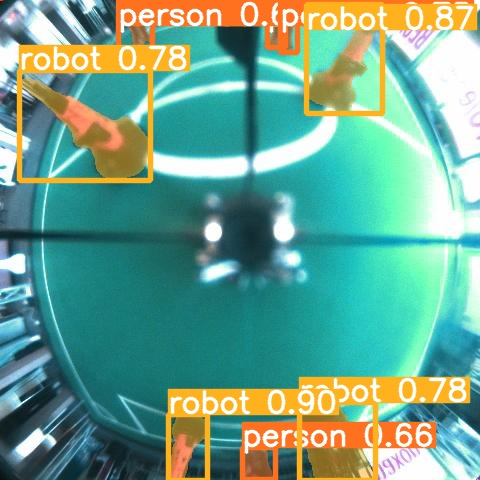

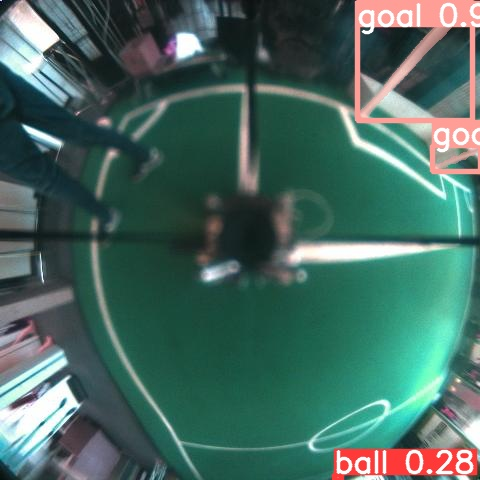

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=900))
      print("\n")

## 🏆 Congratulations

### Some Links

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [LAR Website](https://lar.dei.uminho.pt/): Explore our projects and who we are.
- [LAR YouTube](https://www.youtube.com/@lar_uminho): Our projects in action!
- [LAR Instagram](https://www.instagram.com/lar_uminho/): Stay tuned.
- [YOLOv8 Docs](https://docs.ultralytics.com/): YOLOv8 documentation.


#Extra

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/content/runs/segment/train/")

An error occured when getting the model upload URL: 401 Client Error: Unauthorized for url: https://api.roboflow.com/omnidatasetsegmentation/msl-omnidirecional-lar-uminho/1/uploadModel?api_key=vwFRi233QozkicYHpFpz


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)

